In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Setting the working Directory

In [3]:
import os
print("Current Working Directory:", os.getcwd())
os.chdir('C:/Users/rahma/Deepfake Detection ver 3')

Current Working Directory: C:\Users\rahma\Deepfake Detection ver 3


In [4]:
real = os.listdir('C:/Users/rahma/Deepfake Detection ver 3/Dataset/Training/Real')

In [5]:
fake = os.listdir('C:/Users/rahma/Deepfake Detection ver 3/Dataset/Training/Fake')

In [6]:
print(fake[0:10])

['fake_1000 (2).jpg', 'fake_1000.jpg', 'fake_10000.jpg', 'fake_10001.jpg', 'fake_10002.jpg', 'fake_10003.jpg', 'fake_10004.jpg', 'fake_10005.jpg', 'fake_10006.jpg', 'fake_10007.jpg']


In [7]:
print(real[1:10])

['real_1000.jpg', 'real_10000.jpg', 'real_10001.jpg', 'real_10002.jpg', 'real_10003.jpg', 'real_10004.jpg', 'real_10005.jpg', 'real_10006.jpg', 'real_10007.jpg']


In [8]:
print('fake images',len(fake))
print('real images',len(real))
print('total number of images',len(fake) + len(real))

fake images 19998
real images 19998
total number of images 39996


In [9]:
#Creating a Label for classification (Real and Fake)

In [10]:
fake_labels =[1] * 19998
real_labels = [0] * 19998

In [11]:
print(len(fake_labels))
print(len(real_labels))

19998
19998


In [12]:
labels = fake_labels + real_labels

In [13]:
len(labels)

39996

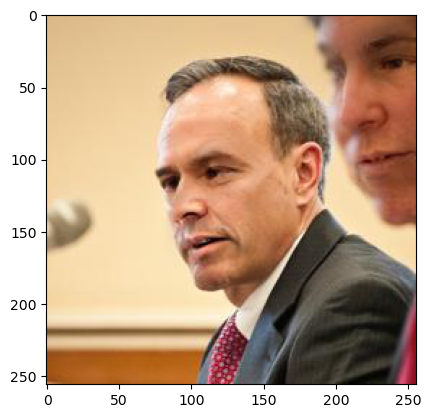

In [14]:
# fake
img = mpimg.imread('C:/Users/rahma/Deepfake Detection ver 3/Dataset/Training/Fake/fake_6170.jpg')
imgplot = plt.imshow(img)
plt.show()

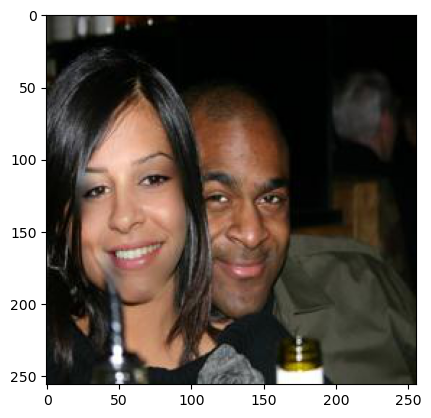

In [16]:
# real
img = mpimg.imread('C:/Users/rahma/Deepfake Detection ver 3/Dataset/Training/Real/real_935.jpg')
imgplot = plt.imshow(img)
plt.show()

In [17]:
#Convert image into numpy array and resize image as well as convert rgb to bgr

In [18]:
fake_path ='C:/Users/rahma/Deepfake Detection ver 3/Dataset/Training/Fake/'
data =[]
# Get list of image files
fake_images = os.listdir(fake_path)

for img_file in fake_images:
    img_path = os.path.join(fake_path, img_file)
    image = Image.open(img_path)
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

real_path ='C:/Users/rahma/Deepfake Detection ver 3/Dataset/Training/Real/'

# Get list of image files
real_images = os.listdir(real_path)

for img_file in real_images:
    img_path = os.path.join(real_path, img_file)
    image = Image.open(img_path)
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

# Convert to NumPy array
data = np.array(data)
data = list(data)

In [19]:
len(data)

39996

In [20]:
type(data)

list

In [21]:
data[0]

array([[[ 33,  33,  33],
        [ 33,  33,  33],
        [ 33,  33,  33],
        ...,
        [ 51,  52,  47],
        [ 50,  51,  46],
        [ 77,  78,  73]],

       [[ 33,  33,  33],
        [ 33,  33,  33],
        [ 33,  33,  33],
        ...,
        [ 45,  46,  41],
        [ 74,  75,  70],
        [126, 127, 122]],

       [[ 33,  33,  33],
        [ 33,  33,  33],
        [ 33,  33,  33],
        ...,
        [ 47,  48,  43],
        [ 99, 100,  95],
        [146, 147, 142]],

       ...,

       [[248, 243, 248],
        [238, 235, 241],
        [232, 229, 238],
        ...,
        [243, 242, 247],
        [238, 237, 242],
        [249, 248, 254]],

       [[246, 241, 245],
        [243, 240, 246],
        [244, 240, 250],
        ...,
        [251, 250, 254],
        [250, 249, 253],
        [254, 253, 255]],

       [[237, 232, 236],
        [241, 238, 243],
        [225, 221, 233],
        ...,
        [245, 244, 249],
        [253, 252, 255],
        [254, 253, 255]]

In [22]:
data[0].shape

(128, 128, 3)

In [23]:
X = np.array(data)
Y = np.array(labels)

In [24]:
print(X[0].shape)

(128, 128, 3)


In [25]:
print(Y)

[1 1 1 ... 0 0 0]


In [26]:
#Taking daata and labeled arrays and performing a test train split

In [27]:
min_samples = min(len(X), len(Y))
X = X[:min_samples]
Y = Y[:min_samples]
X_train,X_test,Y_train,Y_test =train_test_split(X, Y, test_size = 0.15 ,random_state =42)

In [28]:
X_train.shape

(33996, 128, 128, 3)

In [29]:
#Scaling down the daya ayyay between 0 and 1

In [30]:
# we need to set scale between 0 and 1
X_train_scale=X_train/255
X_test_scale=X_test/255

In [31]:
X_train_scale

array([[[[0.71764706, 0.4627451 , 0.22352941],
         [0.70980392, 0.4627451 , 0.22352941],
         [0.70196078, 0.46666667, 0.23137255],
         ...,
         [0.76862745, 0.53333333, 0.29803922],
         [0.76078431, 0.5254902 , 0.29019608],
         [0.76078431, 0.5254902 , 0.29019608]],

        [[0.70980392, 0.4627451 , 0.23137255],
         [0.70588235, 0.4627451 , 0.23137255],
         [0.70196078, 0.46666667, 0.23137255],
         ...,
         [0.76078431, 0.5254902 , 0.29019608],
         [0.76862745, 0.53333333, 0.29803922],
         [0.76862745, 0.53333333, 0.29803922]],

        [[0.69803922, 0.4627451 , 0.23921569],
         [0.69803922, 0.46666667, 0.23921569],
         [0.70196078, 0.4627451 , 0.23921569],
         ...,
         [0.76078431, 0.5254902 , 0.29019608],
         [0.76862745, 0.53333333, 0.29803922],
         [0.76862745, 0.53333333, 0.29803922]],

        ...,

        [[0.74117647, 0.5372549 , 0.38431373],
         [0.78431373, 0.58039216, 0.43137255]

In [32]:
X_train_scale.shape
# (Number of images , width , height , channel)

(33996, 128, 128, 3)

In [33]:
# Adding augmented data to original dataset aand doing a train validation split

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation Generator
datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2  # Split off 20% for validation
)

# Training generator
train_gen = datagen.flow(
    X_train_scale,
    Y_train,
    batch_size=32,
    subset='training'
)

# Validation generator
val_gen = datagen.flow(
    X_train_scale,
    Y_train,
    batch_size=32,
    subset='validation'
)

In [ ]:
#importing the model libraries annd creating the model

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten , Dense , Dropout, BatchNormalization

In [36]:
model = Sequential()

# Conv Block 1
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

# Conv Block 2
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Conv Block 3
model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Dense Block
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())           # Helps speed up + stabilize training
model.add(Dropout(0.5))                   # Reduces overfitting

# Output Layer
model.add(Dense(1, activation='sigmoid'))  # Binary classification

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [ ]:
#Compiling the model

In [38]:
model.compile(optimizer ='adam', loss ='binary_crossentropy', metrics =['accuracy'])

In [ ]:
#using callbacks(early stopping and reduce learninng rate)

In [39]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
EarlyStopping = EarlyStopping(monitor='val_loss', patience=12, verbose=1, mode='min')
ReduceLROnPlateau = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=3, min_lr=1e-6, verbose=1, mode='min')

In [ ]:
#Training the model on trainnning dataset (after traain - valid split)

In [40]:
history = model.fit(
    train_gen,
    validation_data = val_gen,
    epochs = 50,
    callbacks=[EarlyStopping, ReduceLROnPlateau]
)

Epoch 1/50
850/850 [==============================] - 282s 329ms/step - loss: 0.6460 - accuracy: 0.6483 - val_loss: 0.5835 - val_accuracy: 0.6842 - lr: 0.0010
Epoch 2/50
850/850 [==============================] - 244s 287ms/step - loss: 0.5206 - accuracy: 0.7446 - val_loss: 0.5922 - val_accuracy: 0.6883 - lr: 0.0010
Epoch 3/50
850/850 [==============================] - 246s 289ms/step - loss: 0.4075 - accuracy: 0.8214 - val_loss: 0.5372 - val_accuracy: 0.7561 - lr: 0.0010
Epoch 4/50
850/850 [==============================] - 253s 297ms/step - loss: 0.3399 - accuracy: 0.8557 - val_loss: 0.3584 - val_accuracy: 0.8416 - lr: 0.0010
Epoch 5/50
850/850 [==============================] - 243s 286ms/step - loss: 0.3057 - accuracy: 0.8711 - val_loss: 0.2974 - val_accuracy: 0.8760 - lr: 0.0010
Epoch 6/50
850/850 [==============================] - 250s 294ms/step - loss: 0.2769 - accuracy: 0.8862 - val_loss: 0.2408 - val_accuracy: 0.9006 - lr: 0.0010
Epoch 7/50
850/850 [==========================

In [ ]:
#Eveluatinng the model

In [41]:
loss, accuracy = model.evaluate(X_test_scale, Y_test)

188/188 [==============================] - 9s 46ms/step - loss: 0.1240 - accuracy: 0.9537


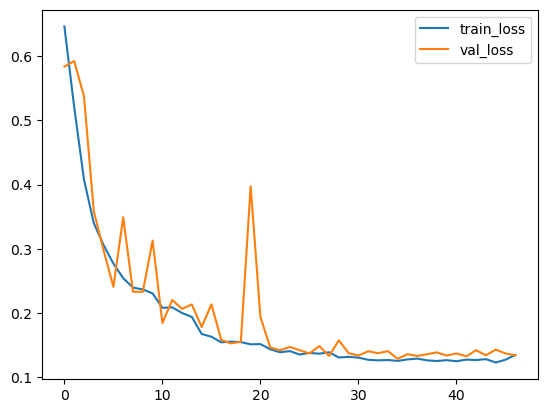

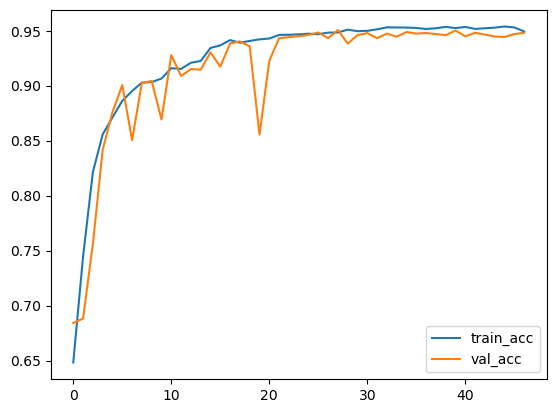

In [42]:
plt.plot(history.history['loss'] , label = 'train_loss')
plt.plot(history.history['val_loss'] , label = 'val_loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'] , label = 'train_acc')
plt.plot(history.history['val_accuracy'] , label = 'val_acc')
plt.legend()
plt.show()

In [ ]:
#Saaving the model

In [43]:
model.save("Model_versioon_3.0.h5")

188/188 [==============================] - 9s 46ms/step
Accuracy: 0.9536666666666667
Precision: 0.9354632587859425
Recall: 0.9747003994673769
F1 Score: 0.9546788392566026

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95      2996
           1       0.94      0.97      0.95      3004

    accuracy                           0.95      6000
   macro avg       0.95      0.95      0.95      6000
weighted avg       0.95      0.95      0.95      6000

Confusion Matrix:
 [[2794  202]
 [  76 2928]]

AUC-ROC Score: 0.9921918750077778




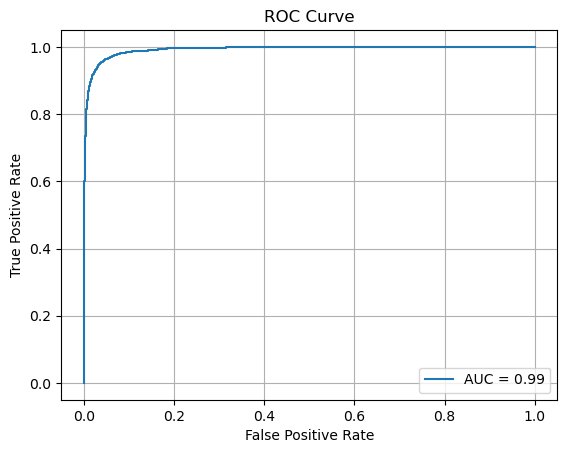

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the model
from tensorflow.keras.models import load_model
model = load_model("Model_versioon_3.0.h5")

# Step 1: Predict probabilities and class labels
y_probs = model.predict(X_test_scale)  # predicted probabilities
y_pred = (y_probs > 0.5).astype("int")  # convert to class labels (binary classification)

# Step 2: Calculate metrics
print("Accuracy:", accuracy_score(Y_test, y_pred))
print("Precision:", precision_score(Y_test, y_pred))
print("Recall:", recall_score(Y_test, y_pred))
print("F1 Score:", f1_score(Y_test, y_pred))
print("\nClassification Report:\n", classification_report(Y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))

# Step 3: AUC-ROC
auc_score = roc_auc_score(Y_test, y_probs)
print("\nAUC-ROC Score:", auc_score)
print("\n")

# Step 4: Plot ROC Curve
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Demo of the model

1/1 [==============================] - 0s 128ms/step


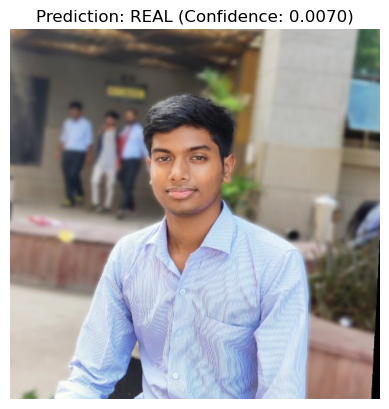

🖼️ Prediction: REAL (Confidence: 0.0070)


In [45]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import tensorflow as tf
from tensorflow import keras

# Load the trained model
loaded_model = keras.models.load_model("Model_versioon_3.0.h5")

# Define image size (same as model input)
IMAGE_SIZE = (128, 128)

def predict_image(image_path, model):
    try:
        # Load image using PIL
        img = Image.open(image_path).convert('RGB')
    except Exception as e:
        print(f"❌ Error: Unable to open image at {image_path} — {e}")
        return None

    # Resize and normalize
    img_resized = img.resize(IMAGE_SIZE)
    img_array = np.array(img_resized) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Expand dims for batch

    # Make prediction
    prediction = model.predict(img_array)
    label = "FAKE" if prediction[0][0] > 0.5 else "REAL"
    confidence = prediction[0][0] if prediction.shape[1] == 1 else max(prediction[0])

    # Display image with matplotlib
    plt.imshow(img)
    plt.title(f"Prediction: {label} (Confidence: {confidence:.4f})")
    plt.axis('off')
    plt.show()

    print(f"🖼️ Prediction: {label} (Confidence: {confidence:.4f})")
    return label, confidence

# Test the function
test_image_path = "C:/Users/rahma/Deepfake Detection ver 2.0/Deepfake Detection Model/uploads/1667835174970.jpeg"
result = predict_image(test_image_path, loaded_model)

1/1 [==============================] - 0s 97ms/step


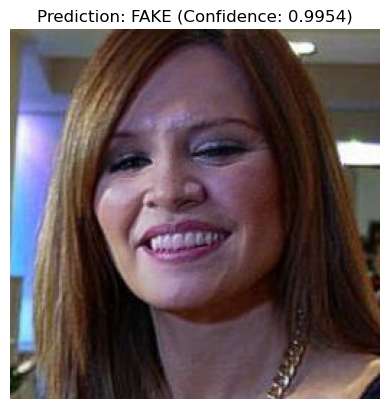

🖼️ Prediction: FAKE (Confidence: 0.9954)


In [49]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import tensorflow as tf
from tensorflow import keras

# Load the trained model
loaded_model = keras.models.load_model("Model_versioon_3.0.h5")

# Define image size (same as model input)
IMAGE_SIZE = (128, 128)

def predict_image(image_path, model):
    try:
        # Load image using PIL
        img = Image.open(image_path).convert('RGB')
    except Exception as e:
        print(f"❌ Error: Unable to open image at {image_path} — {e}")
        return None

    # Resize and normalize
    img_resized = img.resize(IMAGE_SIZE)
    img_array = np.array(img_resized) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Expand dims for batch

    # Make prediction
    prediction = model.predict(img_array)
    label = "FAKE" if prediction[0][0] > 0.5 else "REAL"
    confidence = prediction[0][0] if prediction.shape[1] == 1 else max(prediction[0])

    # Display image with matplotlib
    plt.imshow(img)
    plt.title(f"Prediction: {label} (Confidence: {confidence:.4f})")
    plt.axis('off')
    plt.show()

    print(f"🖼️ Prediction: {label} (Confidence: {confidence:.4f})")
    return label, confidence

# Test the function
test_image_path = "C:/Users/rahma/Deepfake Detection ver 3/Dataset/Testing/Fake/fake_2960.jpg"
result = predict_image(test_image_path, loaded_model)